## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.3 MB/s eta 0:00:00


## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [107]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [108]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.


---


* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [66]:
df.sort_values(by='TotalPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,0.001
423991,573174,16218,CARTOON PENCIL SHARPENERS,1,2011-10-28 10:25:00,0.060,NaN,United Kingdom,0.060
...,...,...,...,...,...,...,...,...,...
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.060,NaN,United Kingdom,11062.060
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.330,NaN,United Kingdom,13541.330
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.500,15098.0,United Kingdom,38970.000
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346.0,United Kingdom,77183.600


In [74]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [121]:
# z-score를 사용하여 outliers를 제거하는 코드

# z-score 계산
zscore = (df["TotalPrice"] - df["TotalPrice"].mean()) / df["TotalPrice"].std()

# outlier 제거
df = df[abs(zscore) <= 3]

# 결과 출력
print(df["TotalPrice"].head())

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalPrice, dtype: float64


In [78]:
df.sort_values(by='TotalPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,0.001
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001
500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,2011-11-25 11:41:00,0.060,12748.0,United Kingdom,0.060
...,...,...,...,...,...,...,...,...,...
378343,569647,22722,SET OF 6 SPICE TINS PANTRY DESIGN,240,2011-10-05 12:35:00,3.450,12415.0,Australia,828.000
373658,569339,22113,GREY HEART HOT WATER BOTTLE,250,2011-10-03 14:18:00,3.320,15299.0,United Kingdom,830.000
253946,559203,47566,PARTY BUNTING,200,2011-07-07 10:43:00,4.150,17723.0,United Kingdom,830.000
369045,569010,23298,SPOTTY BUNTING,200,2011-09-30 07:36:00,4.150,14156.0,EIRE,830.000


In [122]:
#0보다 작은 음수 값 제거
df = df.drop(df[df["TotalPrice"] <= 0].index)

In [82]:
n = 1000
samples = df.sample(n, random_state=42)
samples

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
254643,559328,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,144,2011-07-07 15:31:00,0.29,13743.0,United Kingdom,41.76
420022,572867,23504,PLAYING CARDS JUBILEE UNION JACK,2,2011-10-26 13:19:00,1.25,14598.0,United Kingdom,2.50
521341,580360,23189,SET OF 12 FORK CANDLES,12,2011-12-02 16:14:00,2.89,14493.0,United Kingdom,34.68
521495,580367,21189,WHITE HONEYCOMB PAPER GARLAND,13,2011-12-02 16:39:00,3.29,NaN,United Kingdom,42.77
367445,568894,23367,SET 12 COLOUR PENCILS SPACEBOY,10,2011-09-29 13:04:00,0.65,17528.0,United Kingdom,6.50
...,...,...,...,...,...,...,...,...,...
308399,563953,22355,CHARLOTTE BAG SUKI DESIGN,20,2011-08-22 10:47:00,0.85,16201.0,United Kingdom,17.00
140398,548404,22191,IVORY DINER WALL CLOCK,2,2011-03-31 09:38:00,8.50,16398.0,United Kingdom,17.00
493694,578247,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,5,2011-11-23 12:39:00,2.89,14581.0,United Kingdom,14.45
344684,567094,23202,JUMBO BAG VINTAGE LEAF,4,2011-09-16 12:54:00,2.08,16924.0,United Kingdom,8.32


In [80]:
population_mean = df["TotalPrice"].mean()
population_std = df["TotalPrice"].std()
print(population_mean, population_std)

17.95479043146408 38.576773143469424


In [81]:
sample_mean = samples["TotalPrice"].mean()
sample_std = samples["TotalPrice"].std()
print(sample_mean, sample_std)

17.6335 30.046638404810437


In [70]:
df['TotalPrice'].describe()

count    530104.000000
mean         20.121871
std         270.356743
min           0.001000
25%           3.750000
50%           9.900000
75%          17.700000
max      168469.600000
Name: TotalPrice, dtype: float64

In [71]:
samples['TotalPrice'].describe()

count    1000.000000
mean       19.978170
std        54.488588
min         0.190000
25%         4.130000
50%         9.900000
75%        17.085000
max      1056.000000
Name: TotalPrice, dtype: float64

In [148]:
sample_means = []
n_samples = 1000  # 표본 추출 횟수
sample_size = 50   # 각 표본의 크기

for _ in range(n_samples):
    sample = df["TotalPrice"].sample(n=sample_size)
    sample_means.append(np.mean(sample))

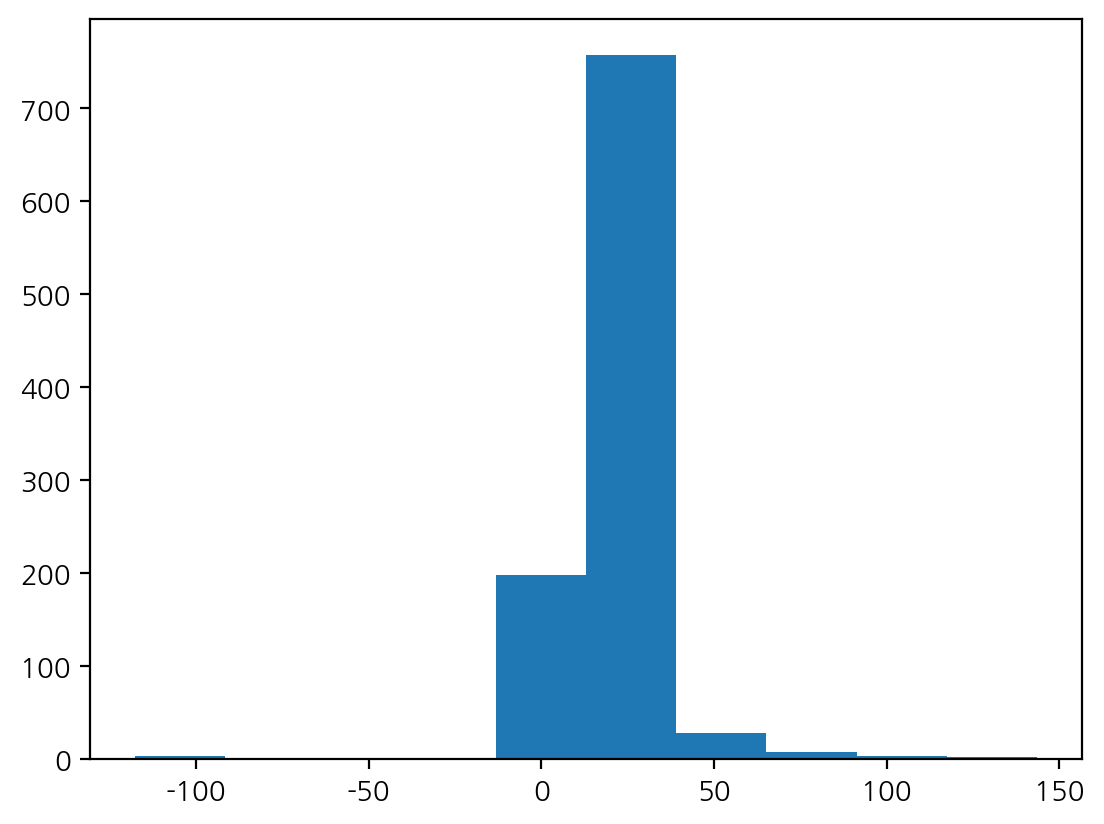

In [50]:
plt.hist(sample_means);

In [150]:
np.mean(sample_means)

18.1403154

### 결과 분석

추출한 1000개의 표본의 평균은 17.6335이고, 표준편차는 30.0466이다.
모집단의 평균은 17.9548이고, 표준편차는 38.5768이다.

표본의 평균은 모집단의 평균과 비슷하지만, 표본의 표준편차는 모집단의 표준편차보다 작다. 이는 표본이 모집단의 일부만을 대표하기 때문이다.

중심극한정리에 따르면, 표본 크기가 충분히 크면 표본의 평균은 모집단의 평균에 근사하게 된다. 표본 크기가 충분히 크면 표본의 분포는 정규분포에 가까워질 것이다.

이러한 결과를 통해, 모집단과 표본은 차이가 있지만, 표본 크기가 충분히 크면 표본의 평균은 모집단의 평균에 근사하게 되고, 표본의 분포는 정규분포에 가까워짐을 알 수 있다.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [97]:
from scipy import stats
df = df[["TotalPrice", "Country"]]


In [105]:
country_group = df.groupby("Country")["TotalPrice"].size()
country_group.sort_values(ascending = False)

Country
United Kingdom          484647
Germany                   9039
France                    8402
EIRE                      7875
Spain                     2478
Netherlands               2351
Belgium                   2031
Switzerland               1966
Portugal                  1499
Australia                 1171
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     450
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      318
Israel                     295
Hong Kong                  282
Singapore                  217
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57


In [99]:
top_2_countries = country_group.sort_values(ascending=False).index[:2]
print(top_2_countries)


CategoricalIndex(['United Kingdom', 'Germany'], categories=['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'], ordered=False, dtype='category', name='Country')


In [100]:
# 독일의 'TotalPrice' 평균 계산
de_total_price = df[df["Country"] == "Germany"]["TotalPrice"].sum()
de_count = df[df["Country"] == "Germany"].shape[0]
de_mean_price = de_total_price / de_count

# 영국의 'TotalPrice' 평균 계산
uk_total_price = df[df["Country"] == "United Kingdom"]["TotalPrice"].sum()
uk_count = df[df["Country"] == "United Kingdom"].shape[0]
uk_mean_price = uk_total_price / uk_count

print(de_mean_price, uk_mean_price)

25.22304900984622 16.43199678116238


In [101]:
t_statistic, p_value = stats.ttest_ind(
    df[df["Country"] == "Germany"]["TotalPrice"],
    df[df["Country"] == "United Kingdom"]["TotalPrice"],
    equal_var=False,
)

print(t_statistic, p_value)

24.10822936880448 1.1676169902049214e-124


결과 분석
---

1. t-통계량과 p-값 해석

  t-통계량은 24.11이다. t-통계량이 1.96 이상이거나 -1.96 이하이면 귀무가설을 기각할 수 있다. 따라서, 이 경우 귀무가설을 기각할 수 있다.

  p-값은 1.1676169902049214e-124이다. p-값이 0.05 미만이면 귀무가설을 기각할 수 있으므로 귀무가설을 기각할 수 있다.

  t-통계량과 p-값이 모두 귀무가설을 기각하는 결과를 나타내므로, 두 국가 간 'TotalPrice' 평균의 차이는 통계적으로 유의미하다고 할 수 있다. 즉, 독일의 'TotalPrice' 평균은 영국의 'TotalPrice' 평균보다 높다는 것을 의미한다.

2. 1종 오류와 2종 오류

  1종 오류는 귀무가설이 참임에도 불구하고 귀무가설을 기각하는 오류다. 2종 오류는 대립가설이 참임에도 불구하고 귀무가설을 기각하지 않는 오류다.

  이 데이터셋의 경우, 귀무가설은 두 국가 간 'TotalPrice' 평균의 차이가 없다는 것이다. 따라서, 1종 오류는 두 국가 간 'TotalPrice' 평균의 차이가 없는데도 불구하고 차이가 있다고 주장하는 것이다. 2종 오류는 두 국가 간 'TotalPrice' 평균의 차이가 있는데도 불구하고 차이가 없다고 주장하는 것이다.

  p-값이 1.1676169902049214e-124로 매우 작기 때문에, 귀무가설을 기각할 확률은 매우 낮다. 따라서, 1종 오류의 위험은 매우 낮다고 할 수 있다. 반면, 2종 오류의 위험은 존재한다.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [130]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

In [110]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,WeekEnd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,주중
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,주중
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,주중
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,주중
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4,주중
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4,주중
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,주중
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,주중


In [129]:
df.sort_values(by='UnitPrice', ascending = True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,WeekEnd
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001,1,주중
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001,6,주말
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,0.001,0,주중
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001,4,주중
408352,571937,16045,POPART WOODEN PENCILS ASST,100,2011-10-20 09:28:00,0.040,14911.0,EIRE,4.000,3,주중
...,...,...,...,...,...,...,...,...,...,...,...
518712,580115,DOT,DOTCOM POSTAGE,1,2011-12-01 16:22:00,1042.840,NaN,United Kingdom,1042.840,3,주중
349412,567507,DOT,DOTCOM POSTAGE,1,2011-09-20 14:46:00,1092.210,NaN,United Kingdom,1092.210,1,주중
514543,579694,DOT,DOTCOM POSTAGE,1,2011-11-30 14:11:00,1119.630,NaN,United Kingdom,1119.630,2,주중
445748,574856,DOT,DOTCOM POSTAGE,1,2011-11-07 12:06:00,1126.290,NaN,United Kingdom,1126.290,0,주중


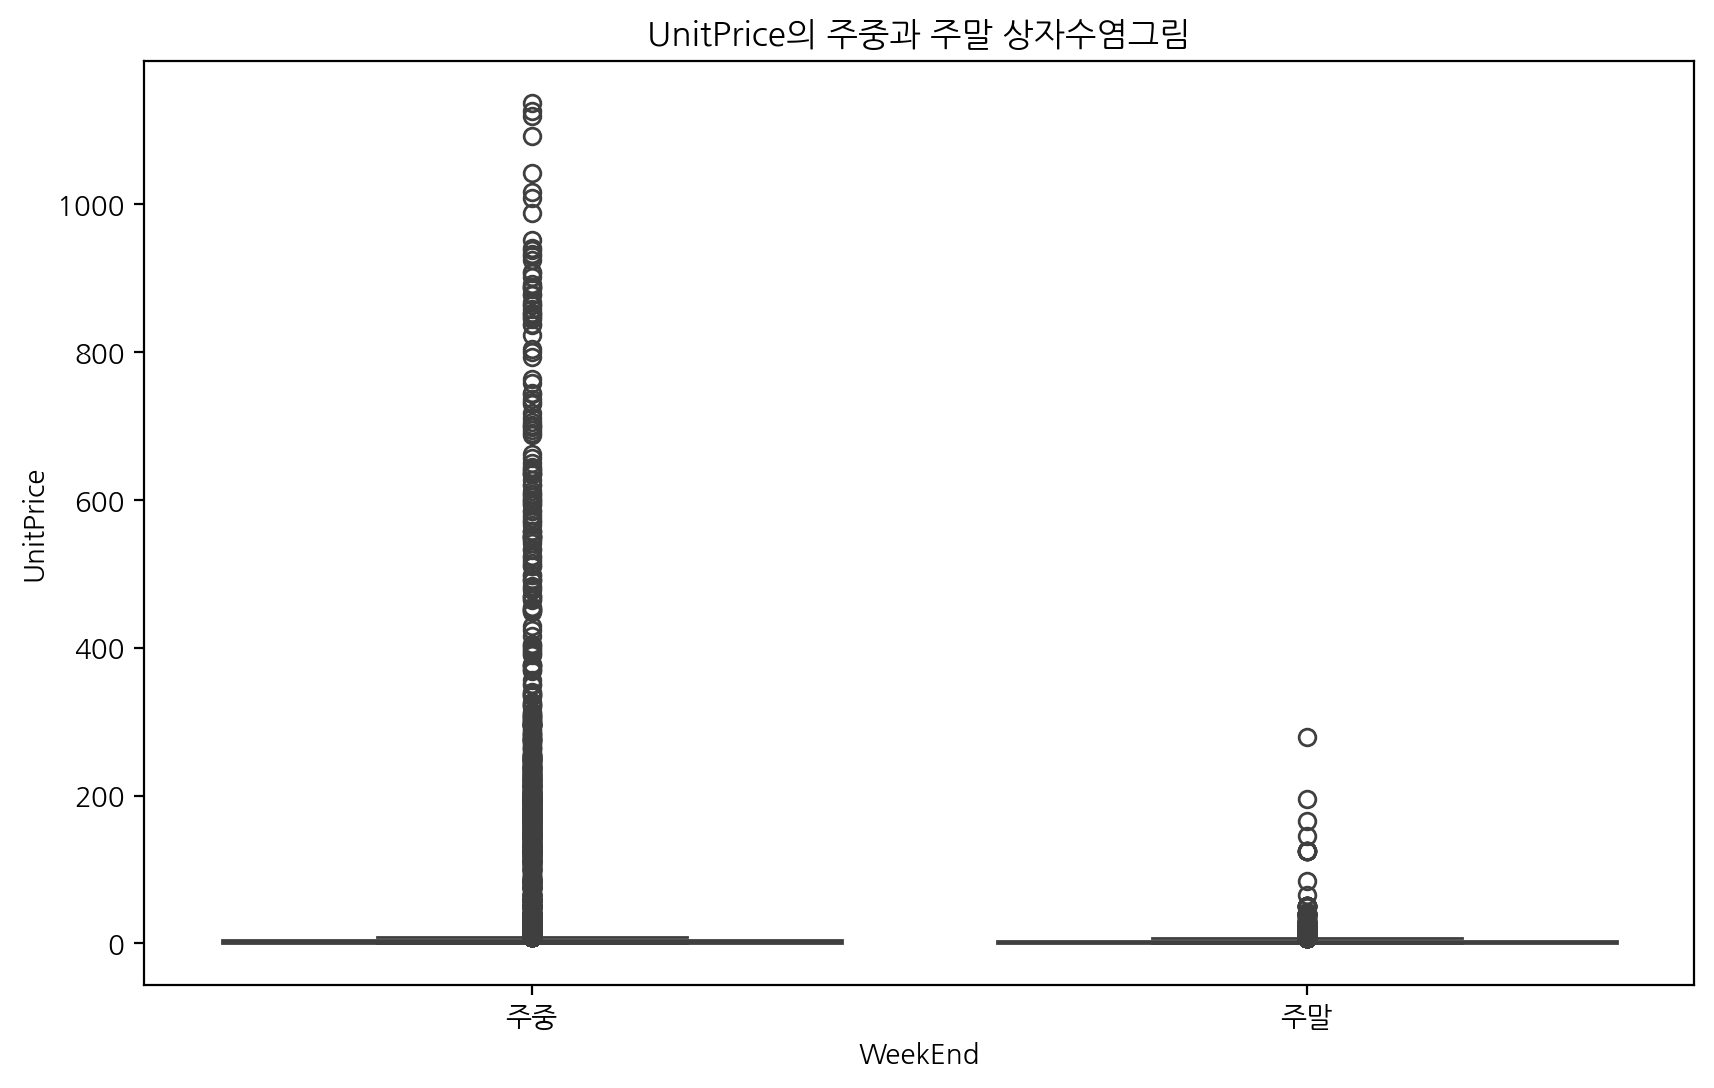

In [151]:
# 상자수염그림
plt.figure(figsize=(10, 6))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('UnitPrice의 주중과 주말 상자수염그림')
plt.show()

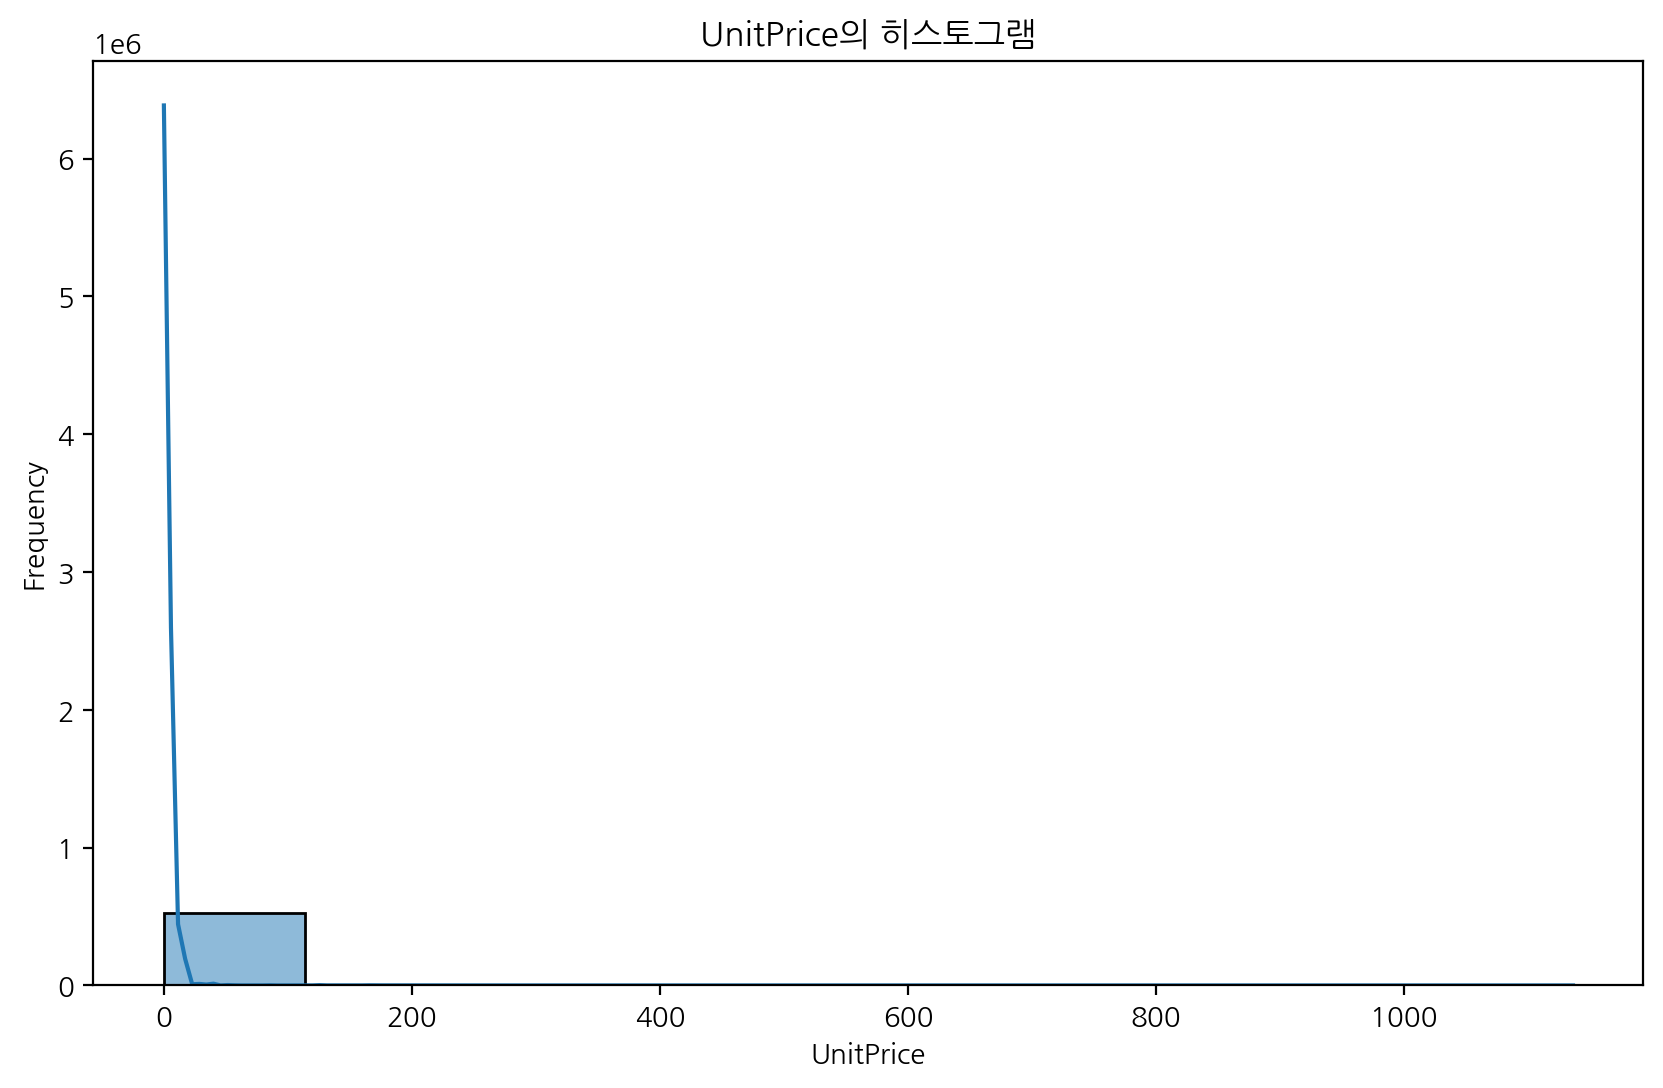

In [135]:
# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='UnitPrice', bins=10, kde=True)
plt.title('UnitPrice의 히스토그램')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()


In [131]:
# 주중 기술통계 및 분위수 분석
weekday_stats = weekday_data['UnitPrice'].describe()
weekday_quantiles = weekday_data['UnitPrice'].quantile([0.25, 0.5, 0.75])

# 주말 기술통계 및 분위수 분석
weekend_stats = weekend_data['UnitPrice'].describe()
weekend_quantiles = weekend_data['UnitPrice'].quantile([0.25, 0.5, 0.75])

# 결과 출력
print("주중 기술통계:")
print(weekday_stats)
print("주중 분위수:")
print(weekday_quantiles)
print("\n주말 기술통계:")
print(weekend_stats)
print("주말 분위수:")
print(weekend_quantiles)

주중 기술통계:
count    465887.000000
mean          3.791929
std          14.140518
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max        1136.300000
Name: UnitPrice, dtype: float64
주중 분위수:
0.25    1.25
0.50    2.10
0.75    4.13
Name: UnitPrice, dtype: float64

주말 기술통계:
count    63900.000000
mean         2.824496
std          3.649158
min          0.001000
25%          1.250000
50%          1.790000
75%          3.750000
max        279.840000
Name: UnitPrice, dtype: float64
주말 분위수:
0.25    1.25
0.50    1.79
0.75    3.75
Name: UnitPrice, dtype: float64


### 주중과 주말의 비교

평균: 주중 데이터의 평균은 3.79이고, 주말 데이터의 평균은 2.82이다. 따라서, 주중 데이터의 평균 단가가 주말 데이터의 평균 단가보다 약간 높다.

중위값: 주중 데이터의 중위값은 2.10이고, 주말 데이터의 중위값은 1.79이다. 따라서, 주중 데이터의 중간값은 주말 데이터의 중간값보다 약간 높다.

분위수: 주중 데이터의 25% 분위수와 75% 분위수는 각각 1.25와 4.13이다. 주말 데이터의 25% 분위수와 75% 분위수는 각각 1.25와 3.75이다. 따라서, 주중 데이터의 분포는 주말 데이터의 분포보다 약간 넓다.

이러한 차이점은 주중과 주말의 구매 패턴에 차이가 있음을 시사한다. 주중에는 평균 단가가 약간 높고, 중간값이 약간 높으며, 분포가 약간 넓은 상품이 더 많이 판매되는 것으로 추정된다.

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [136]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [137]:
df['TotalPrice'].describe()

count    529787.000000
mean         18.344233
std          43.119489
min           0.001000
25%           3.750000
50%           9.900000
75%          17.700000
max        1153.200000
Name: TotalPrice, dtype: float64

In [160]:
target_median = 4.95
above_median = df[df['TotalPrice'] >= 4.95]
below_median = df[df['TotalPrice'] < 4.95]

In [161]:
stat, pvalue = stats.mannwhitneyu(above_median['TotalPrice'], below_median['TotalPrice'], alternative='two-sided', method='auto')
stat, pvalue


(60531315612.0, 0.0)

In [162]:
stats.mannwhitneyu(above_median['TotalPrice'], below_median['TotalPrice'])

MannwhitneyuResult(statistic=60531315612.0, pvalue=0.0)

In [164]:
target_median = 4.95

above_median = df[df['TotalPrice'] >= target_median]
below_median = df[df['TotalPrice'] < target_median]

stat, pvalue = stats.mannwhitneyu(above_median['TotalPrice'], below_median['TotalPrice'], alternative='two-sided', method='auto')

print("Mann-Whitney U-검정 결과:")
print(f"통계량 (U-statistic): {stat}")
print(f"P-value: {pvalue}")

Mann-Whitney U-검정 결과:
통계량 (U-statistic): 60531315612.0
P-value: 0.0


P-value가 0.05보다 작고 통계량이 매우 크기 떄문에 귀무가설을 기각할 수 있다.
즉, 4.95는 중간값이 될 수 없다는 것이다.


## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [ ]:
from scipy import stats


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# UnitPrice 컬럼의 평균과 표준편차 구하기
mean, std = df['UnitPrice'].mean(), df['UnitPrice'].std()

# 95% 신뢰구간 구하기
confidence_interval = np.percentile(df['UnitPrice'], [2.5, 97.5])

# 신뢰구간 출력
print(confidence_interval)


[ 0.39 12.75]


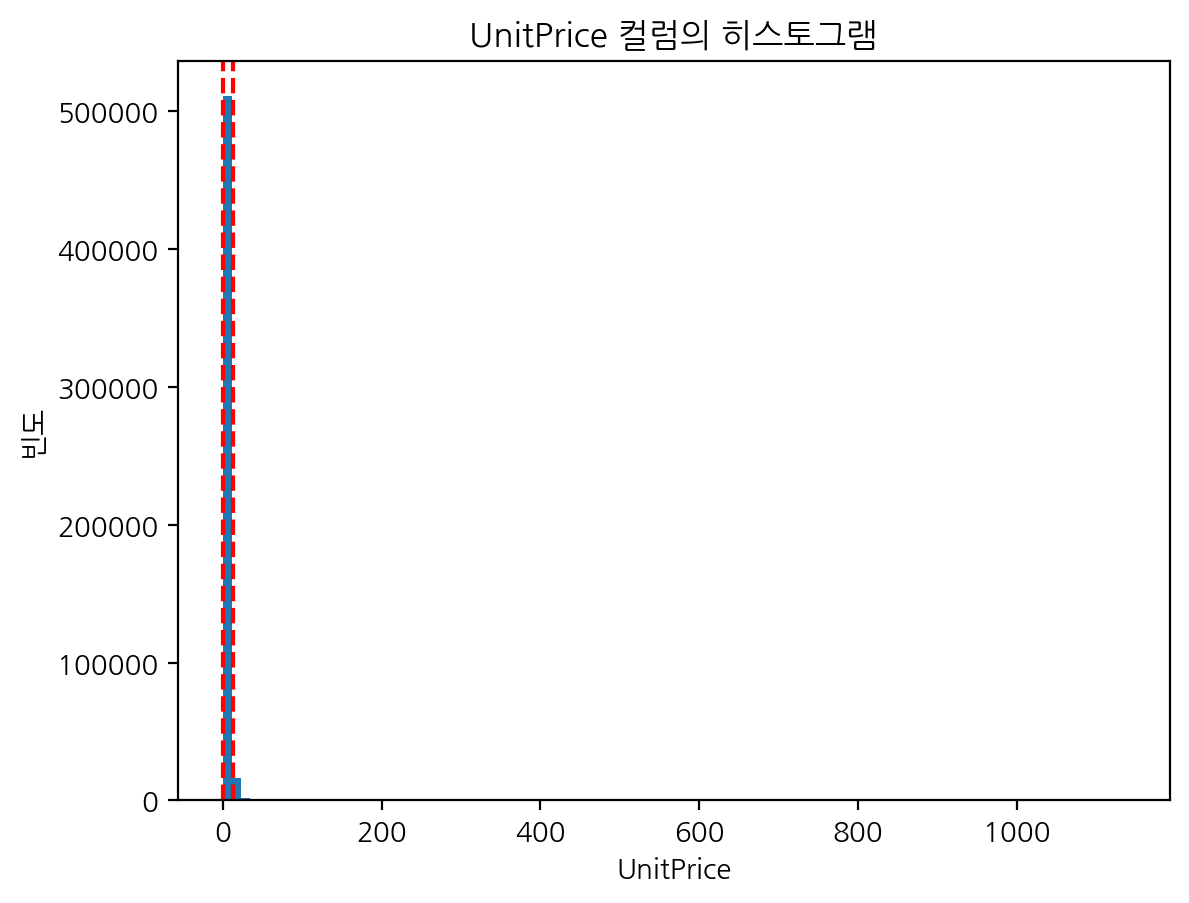

In [147]:
# 히스토그램 그리기
plt.hist(df['UnitPrice'], bins=100)

# 신뢰구간 표시
plt.axvline(confidence_interval[0], color='red', linestyle='dashed')
plt.axvline(confidence_interval[1], color='red', linestyle='dashed')

# 제목 추가
plt.title('UnitPrice 컬럼의 히스토그램')

# x축 레이블 추가
plt.xlabel('UnitPrice')

# y축 레이블 추가
plt.ylabel('빈도')

# 그래프 출력
plt.show()
